In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path1 = '/content/train.csv'
file_path2 = '/content/test.csv'
import pandas as pd
train = pd.read_csv(file_path1)
test = pd.read_csv(file_path2)
train.head()

train.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [ ]:
train.shape

(17307, 3)

In [ ]:
train['essay_id'].nunique()

17307

In [ ]:
train.drop("essay_id", inplace=True, axis=1)

<Axes: xlabel='score', ylabel='count'>

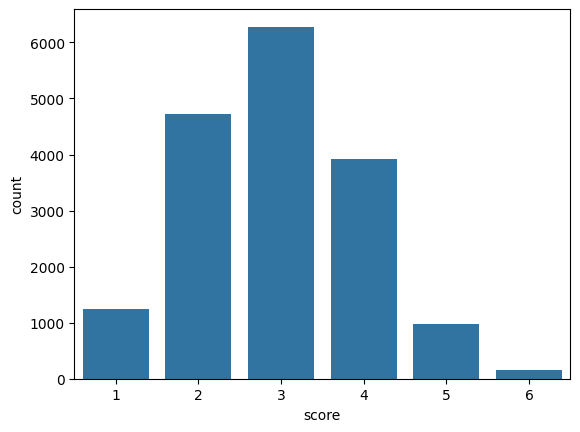

In [ ]:
sns.countplot(data=train, x='score')

In [ ]:
data = train.copy()
data["char_length"] = data['full_text'].apply(lambda x: len(x))
data['word_length'] = data['full_text'].apply(lambda x: len(x.split()))
data['char_per_word'] = round(data["char_length"]/data['word_length'])
data.head()

,full_text,score,char_length,word_length,char_per_word
0,Many people have car where they live. The thin...,3,2677,498,5.0
1,I am a scientist at NASA that is discussing th...,3,1669,332,5.0
2,People always wish they had the same technolog...,4,3077,550,6.0
3,"We all heard about Venus, the planet without a...",4,2701,451,6.0
4,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,373,6.0


In [ ]:



grouped = data.groupby('score')


sample_sizes = {score: int(group.shape[0] / 3) for score, group in grouped}


data1 = pd.concat([group.sample(n=sample_sizes[score], random_state=42) for score, group in grouped])



In [ ]:

data1['lower_text'] = data1['full_text'].apply(lambda x: x.lower())
data1.head()

,full_text,score,char_length,word_length,char_per_word,lower_text
10015,If I was a scientist at NASA discussing the Fa...,1,2091,383,5.0,if i was a scientist at nasa discussing the fa...
17118,"Based on the passage , the government would li...",1,1612,275,6.0,"based on the passage , the government would li..."
14775,The Facial Action Coding System enables comput...,1,1375,258,5.0,the facial action coding system enables comput...
12373,How to be a Cowboy Who Rode the Waves and Seag...,1,1620,317,5.0,how to be a cowboy who rode the waves and seag...
15275,Luke Bomberger used to be an average teenager ...,1,1254,221,6.0,luke bomberger used to be an average teenager ...


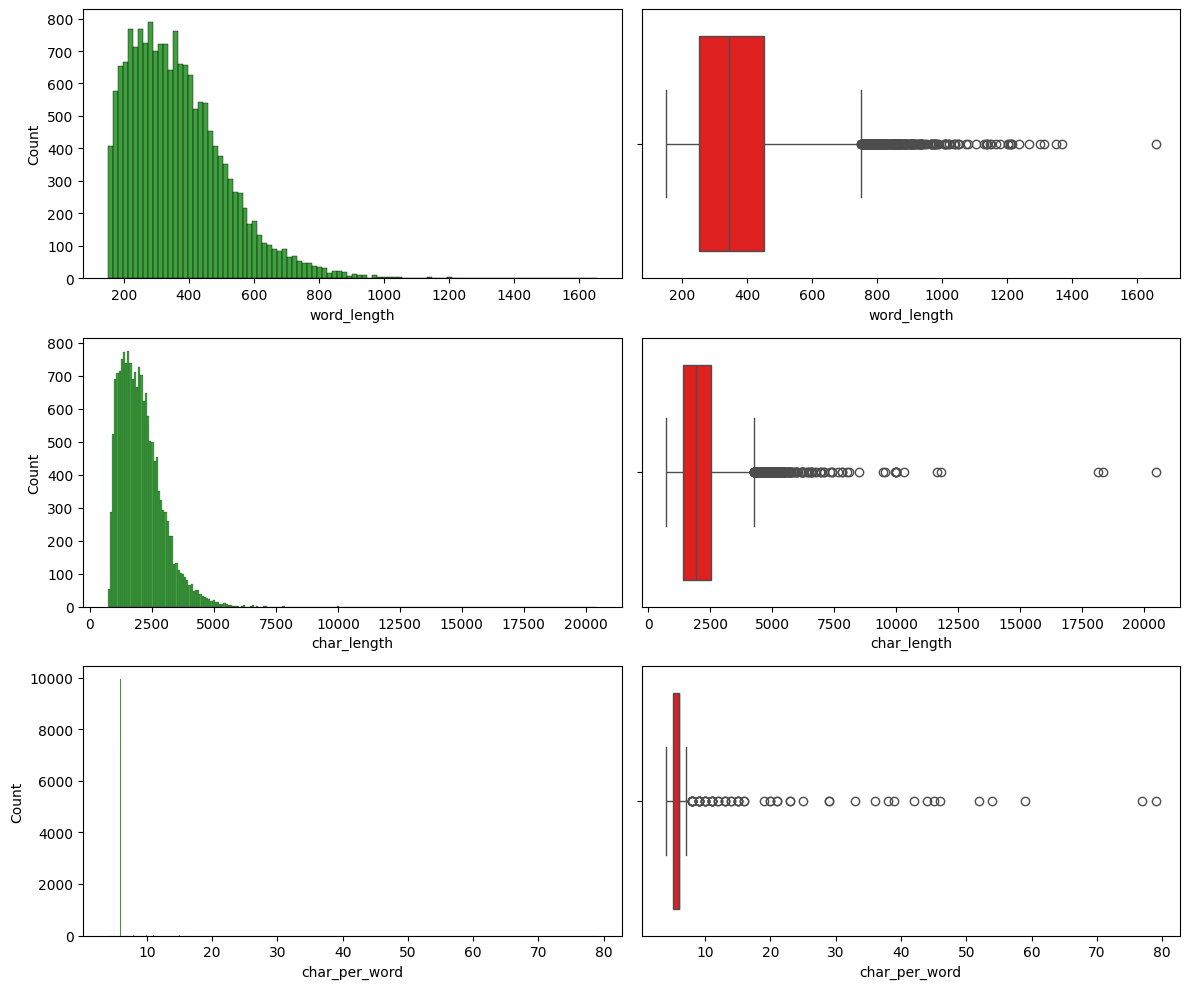

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(data=data, x='word_length', ax=ax[0,0], color='green')
sns.boxplot(data=data, x='word_length', ax=ax[0,1], color='red')
sns.histplot(data=data, x='char_length', ax=ax[1,0], color='green')
sns.boxplot(data=data, x='char_length', ax=ax[1,1], color='red')
sns.histplot(data=data, x='char_per_word', ax=ax[2,0],color='green')
sns.boxplot(data=data, x='char_per_word', ax=ax[2,1], color='red')
plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

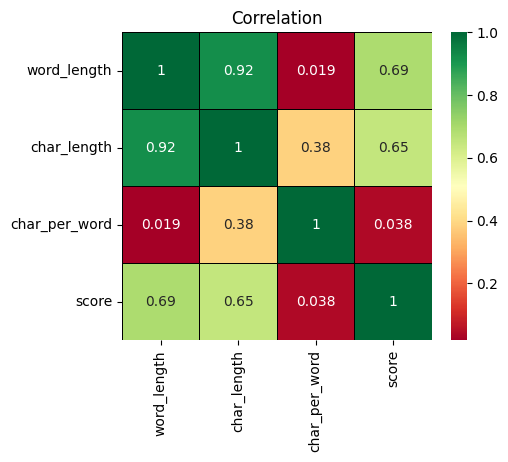

In [ ]:
corr_cols = ['word_length', "char_length", 'char_per_word', 'score']
corr_data = data[corr_cols].corr()
fig = plt.figure(figsize = (5,4))
sns.heatmap(corr_data, annot=True, cmap='RdYlGn', linecolor='black', linewidths=0.5)
plt.title('Correlation')
plt.show()

In [ ]:
!pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import nltk
from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt_tab')

COMMON_WORDS = set(w.lower() for w in words.words()[:2000])
STOP_WORDS = set(stopwords.words('english'))

def get_vocab_score(text) :
    tokens = word_tokenize(text.lower())
    words_only = [w for w in tokens if w.isalpha()]
    total_words = len(words_only)
    unique_words = set(words_only)
    ttr = len(unique_words) / total_words
    advanced_words = [w for w in words_only if w not in COMMON_WORDS and w not in STOP_WORDS]
    advanced_ratio = len(advanced_words) / total_words
    score = (ttr + advanced_ratio) / 2
    return round(score, 3)
data1['vocab_score'] = data1['lower_text'].apply(get_vocab_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


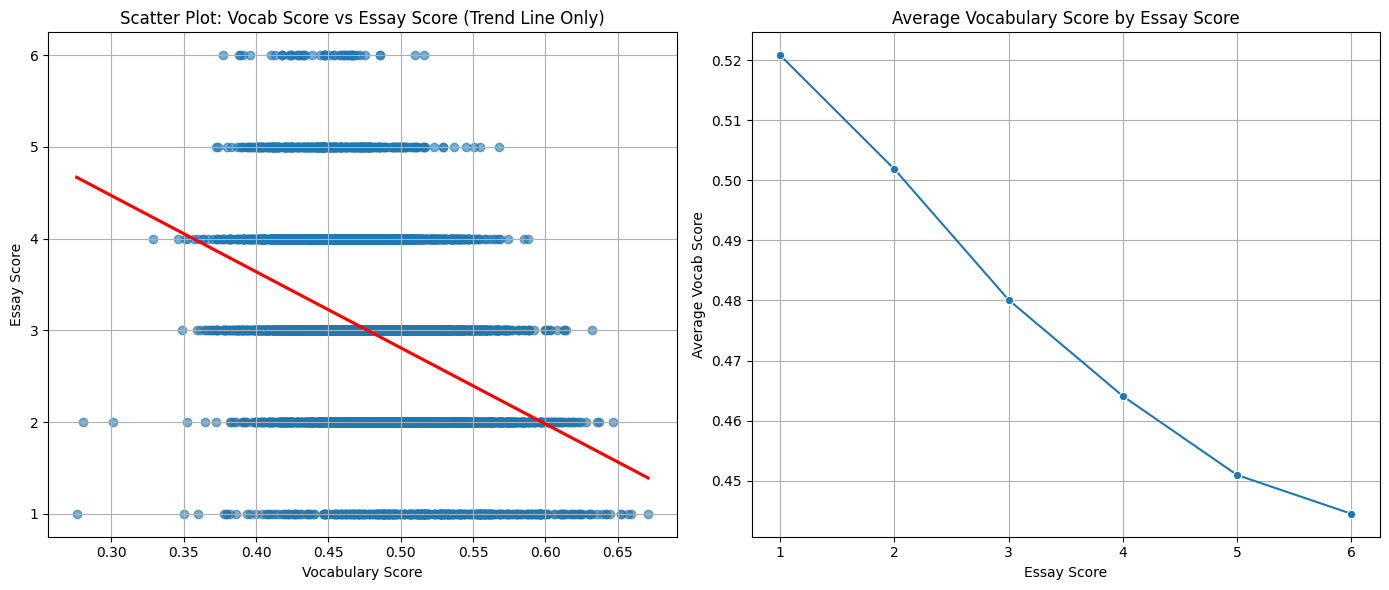

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values (if any)
data7 = data1[['score', 'vocab_score']].dropna()

# Set up 2-plot layout
plt.figure(figsize=(14, 6))

# 1. Scatter Plot with Trend Line (no glow)
plt.subplot(1, 2, 1)
sns.regplot(
    data=data7,
    x='vocab_score',
    y='score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None  # Removes the glow/confidence interval
)
plt.title('Scatter Plot: Vocab Score vs Essay Score (Trend Line Only)')
plt.xlabel('Vocabulary Score')
plt.ylabel('Essay Score')
plt.grid(True)

# 2. Line Plot: Average Vocab Score per Essay Score
plt.subplot(1, 2, 2)
avg_vocab = data7.groupby('score')['vocab_score'].mean()
sns.lineplot(x=avg_vocab.index, y=avg_vocab.values, marker='o')
plt.title('Average Vocabulary Score by Essay Score')
plt.xlabel('Essay Score')
plt.ylabel('Average Vocab Score')
plt.grid(True)

# Final layout adjustment
plt.tight_layout()
plt.show()

In [ ]:
!pip install torch

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
import torch
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def coherence_by_variance(text):
    sentences = sent_tokenize(text)
    embeddings = model.encode(sentences, convert_to_tensor=True)
    embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
    mean_vector = embeddings.mean(dim=0)
    distances = torch.norm(embeddings - mean_vector, dim=1)
    return round(distances.std().item(), 3)

data1['coherence'] = data1['lower_text'].apply(coherence_by_variance)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-15-5ae48dabddb9>:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  return round(distances.std().item(), 3)


In [ ]:
data1['coherence'] = data1['lower_text'].apply(coherence_by_variance)
data1.to_csv("data_with_coherence.csv", index=False)

<ipython-input-15-5ae48dabddb9>:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  return round(distances.std().item(), 3)


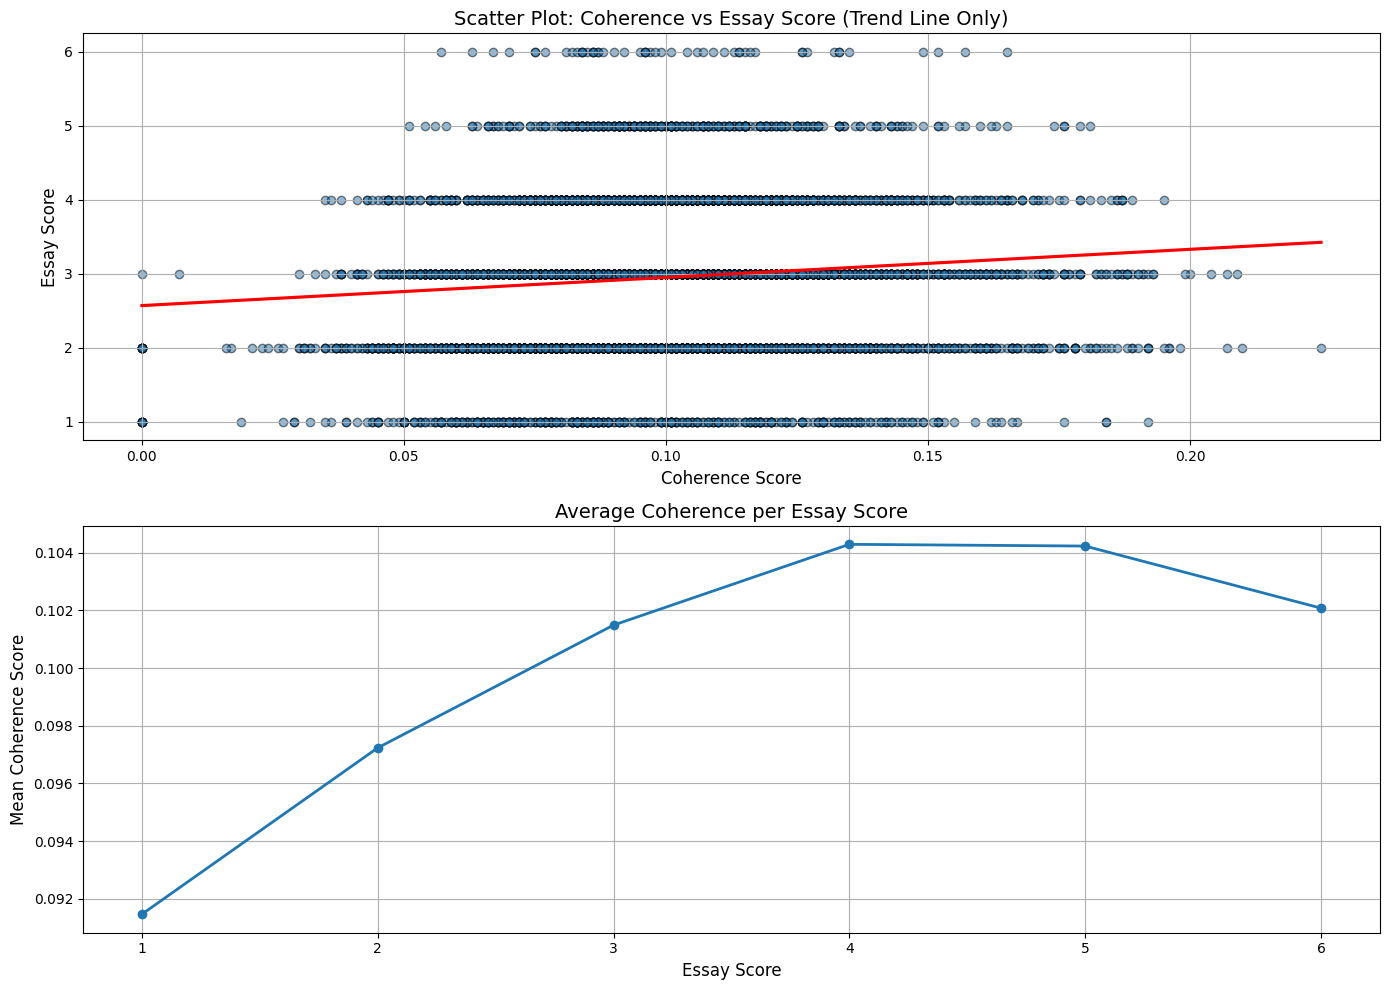

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data5 = pd.read_csv("data_with_coherence.csv")

# Ensure the score column is numeric
data5['score'] = pd.to_numeric(data5['score'], errors='coerce')

# Drop missing values
data5 = data5.dropna(subset=['score', 'coherence'])

# Set up 2-row plot layout
plt.figure(figsize=(14, 10))

# 1. Scatter Plot with Trend Line (no glow)
plt.subplot(2, 1, 1)
sns.regplot(
    data=data5,
    x='coherence',
    y='score',
    scatter_kws={'alpha': 0.5, 'edgecolor': 'k'},
    line_kws={'color': 'red'},
    ci=None  # ❌ disables the glow/confidence interval
)
plt.title('Scatter Plot: Coherence vs Essay Score (Trend Line Only)', fontsize=14)
plt.xlabel('Coherence Score', fontsize=12)
plt.ylabel('Essay Score', fontsize=12)
plt.grid(True)

# 2. Line Plot: Average Coherence per Essay Score
plt.subplot(2, 1, 2)
mean_coherence = data5.groupby('score')['coherence'].mean()
plt.plot(mean_coherence.index, mean_coherence.values, marker='o', linewidth=2)
plt.title('Average Coherence per Essay Score', fontsize=14)
plt.xlabel('Essay Score', fontsize=12)
plt.ylabel('Mean Coherence Score', fontsize=12)
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

In [ ]:

!pip install textstat

import pandas as pd
import textstat


def get_text_standard(text):
    return textstat.text_standard(text)


data1['text_standard'] = data1['full_text'].apply(get_text_standard)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.4 MB/s eta 0:00:00


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
nlp = spacy.load("en_core_web_sm")
transition_phrases = [
    "also", "moreover", "furthermore", "in addition", "additionally",
    "however", "although", "though", "even though", "but", "yet", "whereas",
    "nevertheless", "nonetheless", "despite", "instead",
    "because", "so", "therefore", "thus", "hence", "consequently",
    "as a result", "due to", "since",
    "similarly", "likewise", "just as", "in the same way",
    "for example", "for instance", "such as", "namely", "especially", "in particular",
    "first", "second", "next", "then", "after", "before", "finally",
    "meanwhile", "subsequently", "eventually", "when", "while",
    "in conclusion", "to sum up", "overall", "all in all", "in summary",
    "if", "unless", "provided that", "even if", "in case"
]
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(phrase) for phrase in transition_phrases]
matcher.add("TRANSITIONS", patterns)
def count_transitions(text):
    doc = nlp(text)
    matches = matcher(doc)
    return len(matches)
data1['transition_tags'] = data1['lower_text'].apply(count_transitions)

# Save to CSV
data1.to_csv("data_with_transitions.csv", index=False)

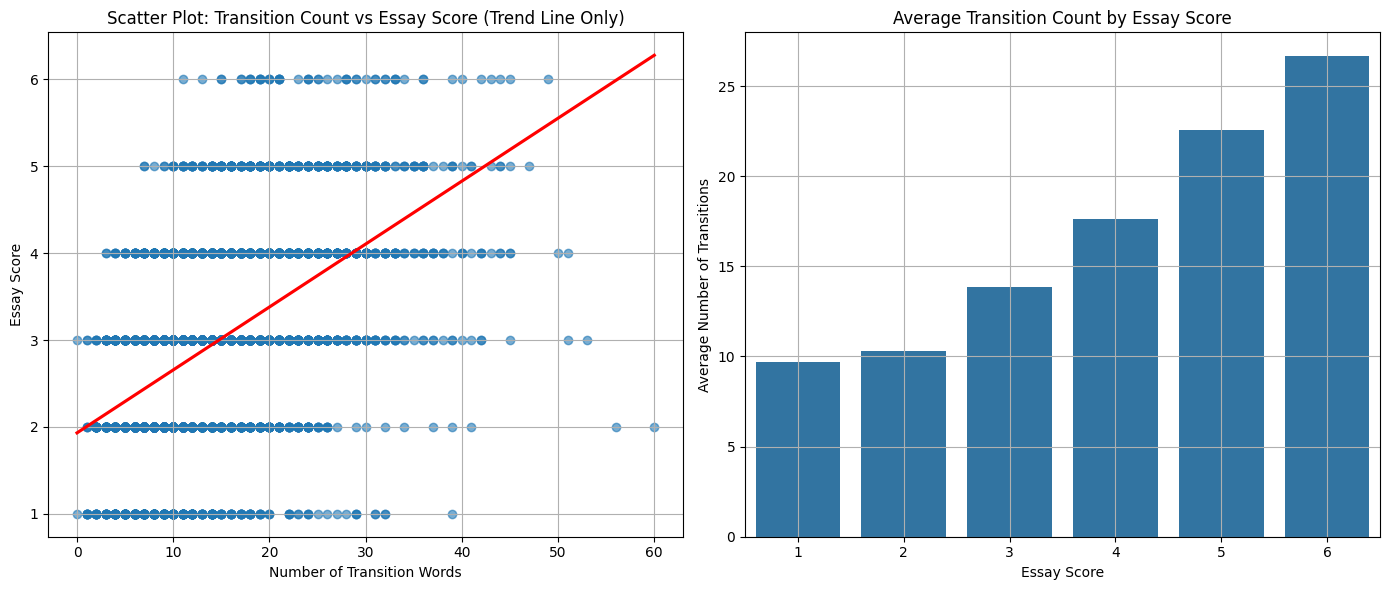

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data6 = pd.read_csv("data_with_transitions.csv")

# Drop missing values
data6 = data6[['score', 'transition_tags']].dropna()

# Set up plot area
plt.figure(figsize=(14, 6))

# 1. Scatter Plot with Trend Line (no glow)
plt.subplot(1, 2, 1)
sns.regplot(
    data=data6,
    x='transition_tags',
    y='score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None  # 🔥 disables the confidence interval glow
)
plt.title('Scatter Plot: Transition Count vs Essay Score (Trend Line Only)')
plt.xlabel('Number of Transition Words')
plt.ylabel('Essay Score')
plt.grid(True)

# 2. Bar Plot: Average transition count by score
plt.subplot(1, 2, 2)
avg_transitions = data6.groupby('score')['transition_tags'].mean()
sns.barplot(x=avg_transitions.index, y=avg_transitions.values)
plt.title('Average Transition Count by Essay Score')
plt.xlabel('Essay Score')
plt.ylabel('Average Number of Transitions')
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
import spacy


nlp = spacy.load("en_core_web_sm")
transitions = [
    "then", "because", "however", "when", "while", "further",
    "before", "after", "thus", "consequently", "also", "whereas",
    "instead", "despite", "since", "unless", "additionally", "though",
       'but','if'
]
def extract_transitions_by_pos(text):
    doc = nlp(text)
    t = 0
    for token in doc:

        if token.text.lower() in transitions:
            t += 1
    return t
data1['transition_tags'] = data1['lower_text'].apply(extract_transitions_by_pos)


data1.to_csv("data_with_transitions.csv", index=False)

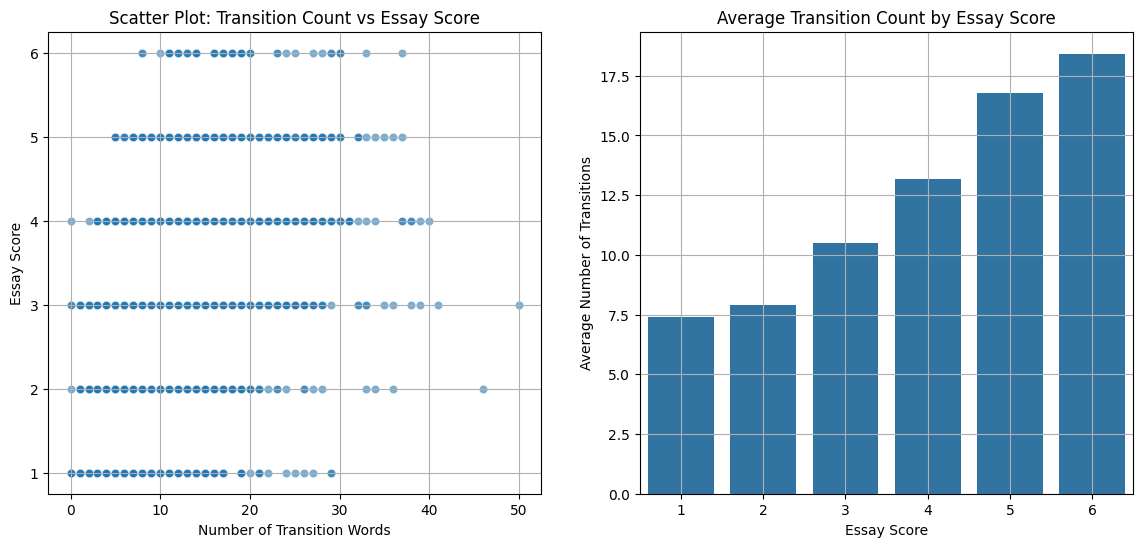

In [ ]:
# Load your dataset
data6 = pd.read_csv("data_with_transitions.csv")

# Drop missing values (if any)
data6 = data6[['score', 'transition_tags']].dropna()

# Set up plot area
plt.figure(figsize=(14, 6))

# 1. Scatter Plot: Transition word count vs Essay score
plt.subplot(1, 2, 1)
sns.scatterplot(data=data6, x='transition_tags', y='score', alpha=0.6)
plt.title('Scatter Plot: Transition Count vs Essay Score')
plt.xlabel('Number of Transition Words')
plt.ylabel('Essay Score')
plt.grid(True)

# 2. Bar Plot: Average transition count by score
plt.subplot(1, 2, 2)
avg_transitions = data6.groupby('score')['transition_tags'].mean()
sns.barplot(x=avg_transitions.index, y=avg_transitions.values)
plt.title('Average Transition Count by Essay Score')
plt.xlabel('Essay Score')
plt.ylabel('Average Number of Transitions')
plt.grid(True)

# Final layout adjustment
plt.show()

In [ ]:


import pandas as pd
import textstat
import re

def get_text_standard(text):
    return textstat.text_standard(text)

data1['text_standard'] = data1['full_text'].apply(get_text_standard)

def convert_text_standard_to_number(text_standard):
    grades = list(map(int, re.findall(r'\d+', text_standard)))
    return sum(grades) / len(grades)

data1['text_grade'] = data1['text_standard'].apply(convert_text_standard_to_number)


data1.to_csv("data_with_readability.csv", index=False)

In [ ]:
import textstat
import re

def extract_readability_score(text):
    grades = list(map(int, re.findall(r'\d+', textstat.text_standard(text))))
    return sum(grades) / len(grades) if grades else None

data1['text_grade'] = data1['full_text'].apply(extract_readability_score)

data1.to_csv("data_with_readability.csv", index=False)

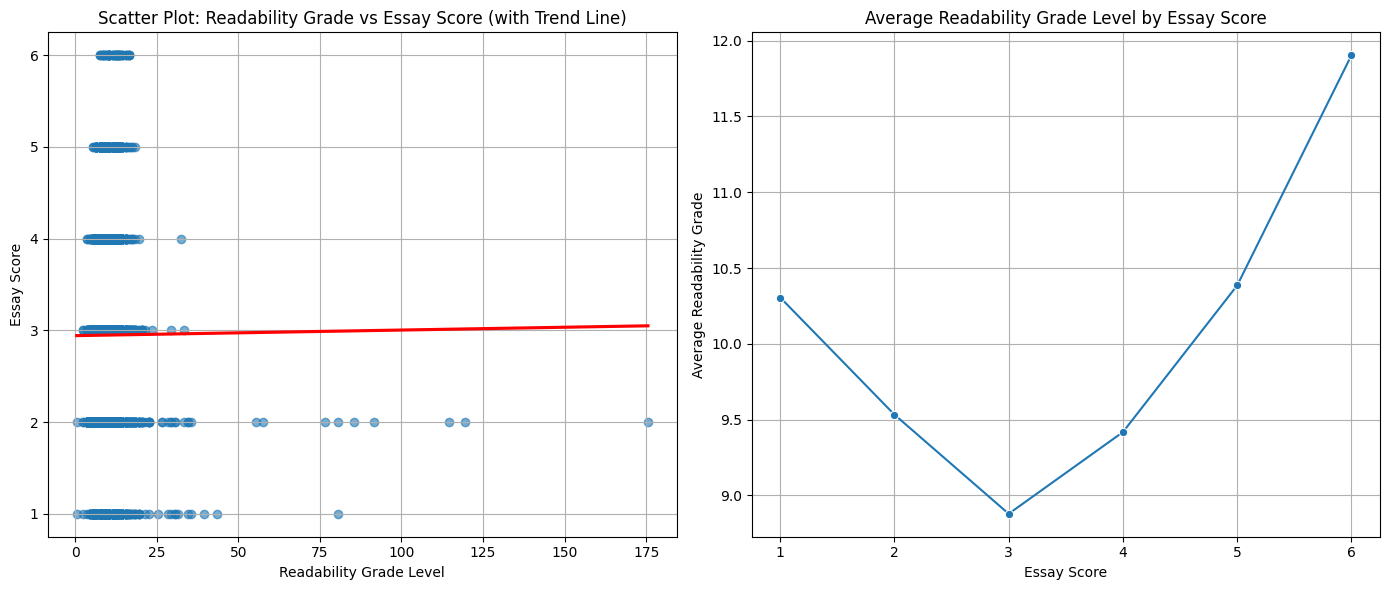

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load your dataset
data8 = pd.read_csv("data_with_readability.csv")

# Drop missing values
textgrade_data = data8[['score', 'text_grade']].dropna()

# Set up plot layout
plt.figure(figsize=(14, 6))

# 1. Scatter Plot with Trend Line (no glow)
plt.subplot(1, 2, 1)
sns.regplot(
    data=textgrade_data,
    x='text_grade',
    y='score',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None  # disables confidence interval shading
)
plt.title('Scatter Plot: Readability Grade vs Essay Score (with Trend Line)')
plt.xlabel('Readability Grade Level')
plt.ylabel('Essay Score')
plt.grid(True)

# 2. Line Plot: Average readability per essay score
plt.subplot(1, 2, 2)
avg_textgrade = textgrade_data.groupby('score')['text_grade'].mean()
sns.lineplot(x=avg_textgrade.index, y=avg_textgrade.values, marker='o')
plt.title('Average Readability Grade Level by Essay Score')
plt.xlabel('Essay Score')
plt.ylabel('Average Readability Grade')
plt.grid(True)

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
print(data1.head())
print(len(data1))

                                               full_text  score  char_length  \
10015  If I was a scientist at NASA discussing the Fa...      1         2091   
17118  Based on the passage , the government would li...      1         1612   
14775  The Facial Action Coding System enables comput...      1         1375   
12373  How to be a Cowboy Who Rode the Waves and Seag...      1         1620   
15275  Luke Bomberger used to be an average teenager ...      1         1254   

       word_length  char_per_word  \
10015          383            5.0   
17118          275            6.0   
14775          258            5.0   
12373          317            5.0   
15275          221            6.0   

                                              lower_text  vocab_score  \
10015  if i was a scientist at nasa discussing the fa...        0.511   
17118  based on the passage , the government would li...        0.573   
14775  the facial action coding system enables comput...        0.489   
1237

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
train_cols = ['vocab_score', 'coherence', 'transition_tags', 'text_grade']
data1.dropna(subset=train_cols, inplace=True)
x = data1[train_cols].copy()
y = data1['score']
x.dropna(subset=train_cols, inplace=True)
y.dropna(inplace=True)


scaler = StandardScaler()
x = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.86
R² Score: 0.25


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"SVR - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


SVR - RMSE: 0.90, MAE: 0.70, R²: 0.29


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


mse = mean_squared_error(y_test, y_pred_rf)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")





Random Forest - RMSE: 1.00, MAE: 0.79, R²: 0.13
